question10

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
import re 
import nltk
from nltk.tokenize import RegexpTokenizer
import unicodedata
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, learning_curve
import tensorflow as tf
from tensorflow  import keras
from keras.utils.vis_utils import plot_model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
import pickle
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from ipywidgets import widgets as w 
from ipywidgets import interact
from sklearn.datasets import make_moons, make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.pipeline import make_pipeline
from math import exp
from numpy.linalg import norm, pinv

In [3]:
import nltk
nltk.download('stopwords')
nltk.download()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\A_mah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


KeyboardInterrupt: 

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords[:20]


In [6]:
def clr(document): 
    document = document.lower()
    document = re.sub(r"<br />", ' ',  document)
    document = re.sub(r'(\n+)|(\s+)', ' ', document)
    document = re.sub(r"[.,(){}]", ' ', document )
    document = re.sub(r"[<>\\/]", ' ', document)
    document = re.sub(r'(\n+)|(\s+)', ' ', document)
    document = re.sub(r'[\W_]+', ' ', document)
    document = doc.strip()
    tokenizer = RegexpTokenizer(r"\w+",  gaps = False)
    document = tokenizer.tokenize(document)
    document = [word for word in document if word not in stopwords]
    document =  [word for word in document if word.isalpha()]
    wln = WordNetLemmatizer()
    document = [wln.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    return document

In [15]:
d1 = pd.read_csv("IMDB50000.csv")
d1.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
d1['review'] = d1.review.apply(clr)


In [17]:
d1.to_csv("updated.csv", index = False)


In [18]:
current_ = CountVectorizer(max_features=1000)
current_mat = current_.fit_transform(d1.review)

vocab = current_.get_feature_names()

In [19]:
d1_current = pd.DataFrame(current_mat.toarray(), columns=vocab)
d1_current.head()

,10,20,30,80,able,about,above,absolutely,across,act,...,year,years,yes,yet,york,you,young,your,yourself,zombie
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,3,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,2
4,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [20]:
d1_current["sentiment"] = np.where(df["sentiment"].values =="positive", 1, 0)
d1_current = pd.DataFrame(np.where(d1_current>0, 1, 0), columns= d1_current.columns)
d1_current.head()

,10,20,30,80,able,about,above,absolutely,across,act,...,years,yes,yet,york,you,young,your,yourself,zombie,sentiment
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [21]:
X_train, X_test, y_train, y_test = train_test_split(d1_current.iloc[:, :-1], 
                                    d1_current["sentiment"], 
                                    test_size=0.2,
                                    stratify=d1_current["sentiment"], 
                                    random_state= 42 )

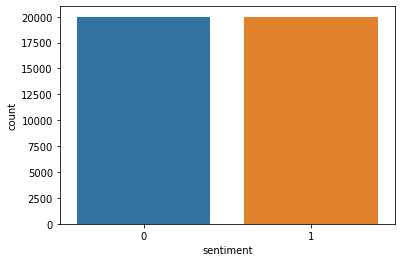

In [22]:
sns.countplot(x = y_train)
plt.show()

In [26]:
current_hidden = keras.layers.Dense(units = 500, input_shape=[X_train.shape[1]], activation = 'sigmoid')
out = keras.layers.Dense(units = 1, activation = 'sigmoid')
mod = tf.keras.Sequential([current_hidden, out])

In [28]:
mod.summary()
mod.compile(loss='binary_crossentropy',  metrics="accuracy")
hist = mod.fit(X_train.values, y_train.values, epochs=10,  validation_split=0.3)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 501       
Total params: 501,001
Trainable params: 501,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
875/875 [==============================] - 4s 4ms/step - loss: 0.0773 - accuracy: 0.9777 - val_loss: 0.6578 - val_accuracy: 0.8414
Epoch 2/10
875/875 [==============================] - 3s 4ms/step - loss: 0.0672 - accuracy: 0.9812 - val_loss: 0.6877 - val_accuracy: 0.8401
Epoch 3/10
875/875 [==============================] - 4s 4ms/step - loss: 0.0579 - accuracy: 0.9841 - val_loss: 0.7220 - val_accuracy: 0.8410
Epoch 4/10
875/875 [==============================] - 3s 4ms/step - loss: 0.0500 - acc

In [29]:
pd.DataFrame(hist.history, columns = hist.history.keys()).to_csv('res.csv', index = False)


In [30]:
mod.evaluate(X_test.values, y_test.values)


313/313 [==============================] - 0s 971us/step - loss: 0.9057 - accuracy: 0.8431


[0.9056939482688904, 0.8431000113487244]

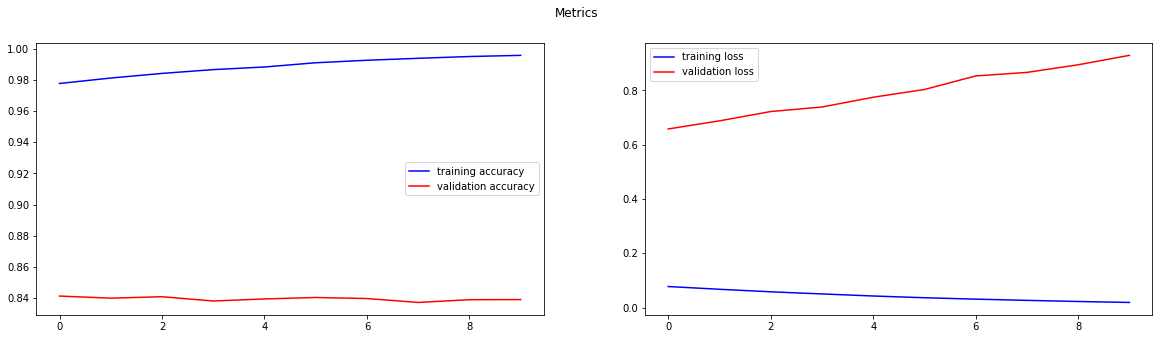

In [31]:
plt.figure(figsize=(20, 5))

plt.subplot(1,2, 1)
plt.plot(hist.history["accuracy"], color = 'blue', label="training accuracy")
plt.plot(hist.history["val_accuracy"], color = 'red', label="validation accuracy")
plt.legend()

plt.subplot(1,2, 2)
plt.plot(hist.history["loss"], color = 'blue', label="training loss")
plt.plot(hist.history["val_loss"], color = 'red', label="validation loss")
plt.legend()

plt.suptitle("Metrics")
plt.show()

In [32]:
df = pd.read_csv("updated.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [33]:
vectt = TfidfVectorizer(max_features=100)
vect_mat = vectt.fit_transform(df.review)
word = vectt.get_feature_names()

In [35]:
vect_mat = pd.DataFrame(vect_mat.toarray(), columns = word)
print(vect_mat)

          about     after       all  also        an       and  any       are  \
0      0.052849  0.069795  0.046623   0.0  0.048409  0.174585  0.0  0.089633   
1      0.072491  0.000000  0.127902   0.0  0.000000  0.279385  0.0  0.122947   
2      0.000000  0.000000  0.000000   0.0  0.000000  0.199201  0.0  0.076703   
3      0.000000  0.000000  0.244084   0.0  0.000000  0.203112  0.0  0.156419   
4      0.107460  0.000000  0.094800   0.0  0.000000  0.147912  0.0  0.045564   
...         ...       ...       ...   ...       ...       ...  ...       ...   
49995  0.061954  0.000000  0.109310   0.0  0.000000  0.238773  0.0  0.000000   
49996  0.000000  0.000000  0.080097   0.0  0.000000  0.099977  0.0  0.000000   
49997  0.000000  0.000000  0.049039   0.0  0.050918  0.183632  0.0  0.047139   
49998  0.141663  0.000000  0.062487   0.0  0.000000  0.311986  0.0  0.120132   
49999  0.079477  0.000000  0.070113   0.0  0.000000  0.087516  0.0  0.000000   

             as        at  ...      wel

In [36]:
vect_mat["sentiment"] = np.where(df["sentiment"]=="positive", 1, 0 )
vect_mat.head()

,about,after,all,also,an,and,any,are,as,at,...,were,what,when,which,who,will,with,would,you,sentiment
0,0.052849,0.069795,0.046623,0.0,0.048409,0.174585,0.0,0.089633,0.162851,0.000000,...,0.0,0.108242,0.000000,0.062157,0.101276,0.0,0.191665,0.059856,0.135146,1
1,0.072491,0.000000,0.127902,0.0,0.000000,0.279385,0.0,0.122947,0.000000,0.000000,...,0.0,0.000000,0.000000,0.085259,0.000000,0.0,0.157741,0.000000,0.061792,1
2,0.000000,0.000000,0.000000,0.0,0.000000,0.199201,0.0,0.076703,0.000000,0.080211,...,0.0,0.000000,0.097364,0.000000,0.000000,0.0,0.131214,0.000000,0.000000,1
3,0.000000,0.000000,0.244084,0.0,0.000000,0.203112,0.0,0.156419,0.142096,0.000000,...,0.0,0.000000,0.099275,0.108470,0.000000,0.0,0.200685,0.000000,0.157229,0
4,0.107460,0.000000,0.094800,0.0,0.000000,0.147912,0.0,0.045564,0.041391,0.000000,...,0.0,0.055023,0.000000,0.063193,0.000000,0.0,0.038972,0.000000,0.000000,1


In [38]:
#document clearrer failing todo resolve after downloading cuda toolkit
X_train, X_test, y_train, y_test = train_test_split(current_.iloc[:, :-1], 
                                    current_["sentiment"], 
                                    test_size=0.2,
                                    stratify=current_["sentiment"], 
                                    random_state= 42 )

TypeError: 'CountVectorizer' object is not subscriptable

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes= [500], 
                    activation="logistic", 
                    solver = "adam", 
                    alpha=0.1, 
                    random_state=42,
                    max_iter = 200, 
                    verbose=1)

In [ ]:
mlp.fit(X_train, y_train)


In [ ]:
confusion_matrix(y_test, mlp.predict(X_test))
